# **Telecom Churn Predicition Case Study**

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will see the analyese of customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

  # **Table Of Contents**<a name="top"></a>


---



---

  
  1. [About the Dataset](#1)
  2. [Data Understanding](#2)
  3. [Expainatory Data Analysis](#3)
  4. [Data Prepartion](#4)
  5. [Model Building and Evaluations](#5)
  6. [Summary & Conclusion](#6)
  7. [References](#7)

# 1: AboutDataset <a name="1"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

The dataset is sourced from Kaggle.

The dataset contains 69999 records and 172 columns

In [1]:
## For simplicity purposes I have downloaded data from kaggle and placed it on Github
!git clone https://github.com/hargurjeet/Telecom-Churn-Prediction.git

Cloning into 'Telecom-Churn-Prediction'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 74 (delta 41), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (74/74), 19.67 MiB | 5.40 MiB/s, done.


In [ ]:
## I use sweetviz for visualization hence it is required to be installed and kernal needed to be restarted
!pip install sweetviz
!pip install ipywidgets

In [2]:
## Data preprocessing libraries
import numpy as np
import pandas as pd 
import zipfile


## Libraries for building visuals
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for data preprocessing
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/content/Telecom-Churn-Prediction'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
## Acesssing the Training Dataset
train_file_path = zipfile.ZipFile('/content/Telecom-Churn-Prediction/train.zip') 
tc_train = pd.read_csv(train_file_path.open('train.csv'))
tc_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
tc_train.shape

(69999, 172)

# 2: Data Understanding <a name="2"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [ ]:
tc_train.info(verbose=True, show_counts=True)

**Key observation** - 
- Some columns seems to have high number null values within the datasets.
- High number of numberica columns along with few date columns.

# 3: Explainatory Data Analysis <a name="3"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [ ]:
## Counting the percent of null values
pd.options.display.max_rows = 180
(tc_train.isnull().sum().sort_values(ascending=False)/ len (tc_train))*100

In [8]:
## Following list of columns seems to have high number of null values
missing_cols =[
    "arpu_3g_6",
    "count_rech_2g_6",
    "night_pck_user_6",
    "arpu_2g_6",
    "date_of_last_rech_data_6",
    "total_rech_data_6",
    "av_rech_amt_data_6",
    "max_rech_data_6",
    "count_rech_3g_6",
    "fb_user_6",
    "night_pck_user_7",
    "date_of_last_rech_data_7",
    "total_rech_data_7",
    "max_rech_data_7",
    "fb_user_7",
    "count_rech_2g_7",
    "count_rech_3g_7",
    "arpu_3g_7",
    "av_rech_amt_data_7",
    "arpu_2g_7",
    "count_rech_2g_8",
    "av_rech_amt_data_8",
    "night_pck_user_8",
    "max_rech_data_8",
    "total_rech_data_8",
    "arpu_2g_8",
    "arpu_3g_8",
    "date_of_last_rech_data_8",
    "fb_user_8",
    "count_rech_3g_8",
    "count_rech_3g_8",
]

## dropping these columns from the original dataset to make it suitable for EDA
tc_train =tc_train.drop(labels=missing_cols, axis=1).copy()

## removing id columns as well
tc_train =tc_train.drop(labels='id', axis=1).copy()

tc_train.shape

(69999, 141)

In [9]:
## Working on the left over columns with nulls
(tc_train.isnull().sum().sort_values(ascending=False)/ len (tc_train))*100

loc_ic_mou_8            5.290076
og_others_8             5.290076
loc_og_t2f_mou_8        5.290076
loc_ic_t2t_mou_8        5.290076
spl_og_mou_8            5.290076
loc_og_t2m_mou_8        5.290076
loc_ic_t2m_mou_8        5.290076
loc_ic_t2f_mou_8        5.290076
loc_og_t2t_mou_8        5.290076
std_og_t2f_mou_8        5.290076
roam_og_mou_8           5.290076
loc_og_mou_8            5.290076
std_ic_t2t_mou_8        5.290076
roam_ic_mou_8           5.290076
isd_og_mou_8            5.290076
std_ic_t2m_mou_8        5.290076
offnet_mou_8            5.290076
std_ic_t2f_mou_8        5.290076
onnet_mou_8             5.290076
std_og_t2t_mou_8        5.290076
std_ic_t2o_mou_8        5.290076
std_og_mou_8            5.290076
std_ic_mou_8            5.290076
spl_ic_mou_8            5.290076
std_og_t2m_mou_8        5.290076
isd_ic_mou_8            5.290076
std_og_t2c_mou_8        5.290076
ic_others_8             5.290076
loc_og_t2c_mou_8        5.290076
isd_og_mou_6            3.954342
spl_og_mou

In [10]:
# Creating a list of columns having null values
cols_nulls = tc_train.columns[tc_train.isna().any()].tolist()
len(cols_nulls)

95

In [16]:
sweet_report = sv.analyze(tc_train,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

Following are the key observation after creating the report from sweetviz

- Circle_id, loc_og_t2o_mou, std_og_t2o_mou,loc_ic_t2o_mou, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8 have constant values. Hence dropping these columns would make sense

# 4: Data Preprocessing <a name="1"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [12]:
constant_cols = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou','loc_ic_t2o_mou', 'last_date_of_month_6',\
                 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',\
                 'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']

In [13]:
## dropping these columns from the original dataset to make it suitable for EDA
tc_train =tc_train.drop(labels=constant_cols, axis=1).copy()

tc_train.shape

(69999, 128)

In [14]:
cols_nulls = tc_train.columns[tc_train.isna().any()].tolist()
len(cols_nulls)

84

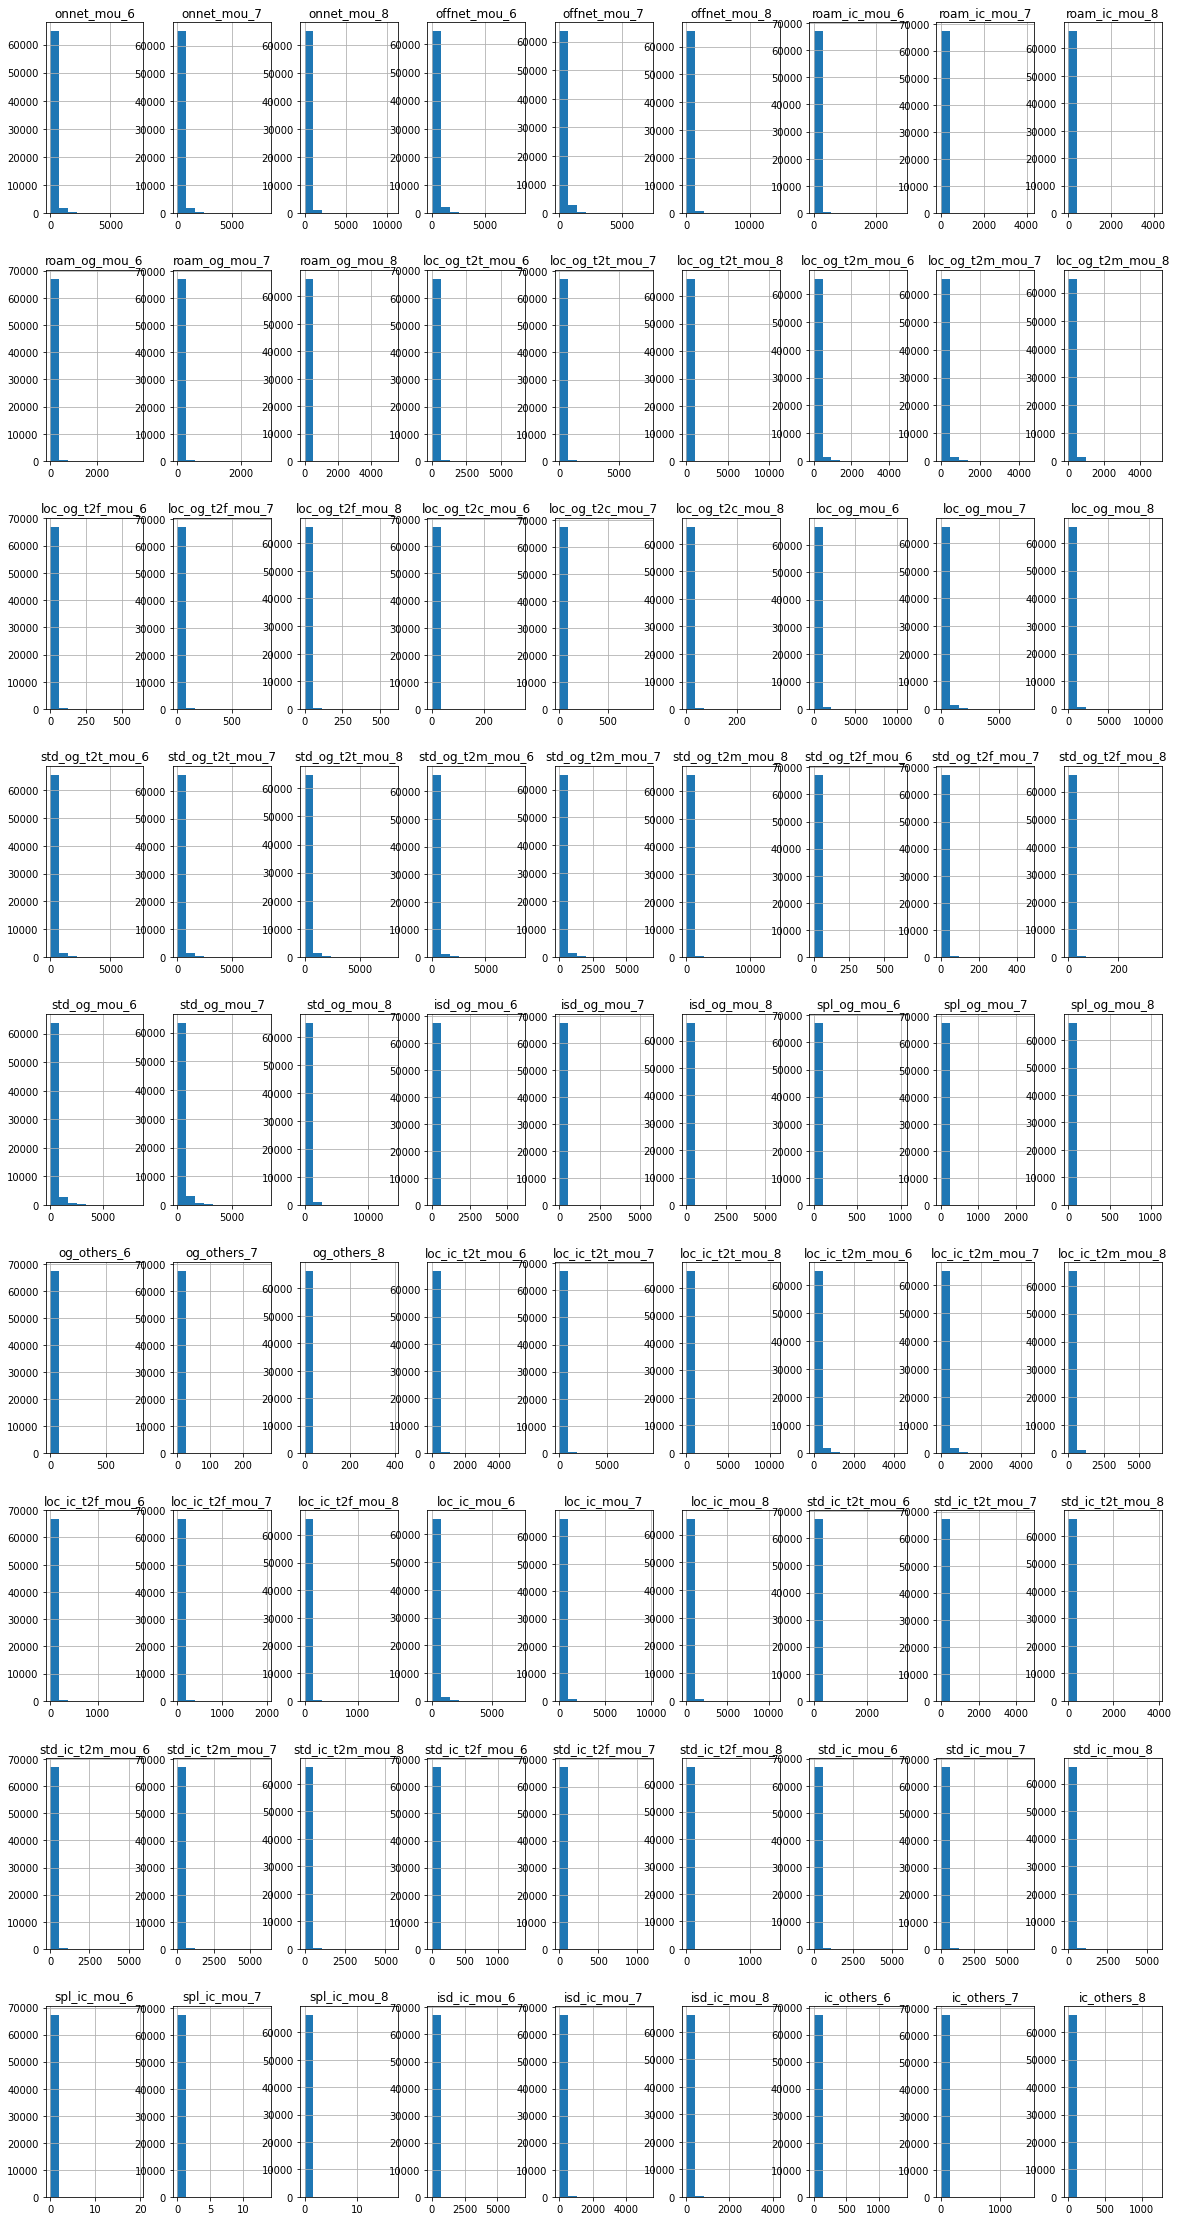

In [15]:
tc_train[cols_nulls].hist(figsize=(20,40));

In [16]:
# most of the above columns are heavly skewed towards 0. Hence replacing nulls by zero
tc_train[cols_nulls] = tc_train[cols_nulls].fillna(0)

tc_train.isnull().sum()

arpu_6                 0
arpu_7                 0
arpu_8                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0
std_og_t2t_mou_6       0
std_og_t2t_mou_7       0
std_og_t2t_mou_8       0
std_og_t2m_mou_6       0
std_og_t2m_mou_7       0
std_og_t2m_mou_8       0
std_og_t2f_mou_6       0
std_og_t2f_mou_7       0
std_og_t2f_mou_8       0
std_og_mou_6           0


In [17]:
pd.set_option('display.max_columns', None)
tc_train.head(2)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.0,0.0,0.0,0.0,0.0,0.0,2.23,0.0,0.28,5.29,16.04,2.33,0.0,0.0,0.0,0.0,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.2,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.0,3.26,24.76,24.71,0.0,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.0,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.4,3.44,39.44,25.03,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.0,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0.0,352.91,0.0,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0


In [18]:
tc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 128 entries, arpu_6 to churn_probability
dtypes: float64(99), int64(26), object(3)
memory usage: 68.4+ MB


In [19]:
## Identifying the date columns and converting them to the right format
date_cols = [
    # 'last_date_of_month_6',
    # 'last_date_of_month_7',
    # 'last_date_of_month_8',
    'date_of_last_rech_6',
    'date_of_last_rech_7',
    'date_of_last_rech_8'
]

tc_train[date_cols] = tc_train[date_cols].apply(pd.to_datetime, errors = 'coerce') 

tc_train[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_of_last_rech_6  69999 non-null  datetime64[ns]
 1   date_of_last_rech_7  69999 non-null  datetime64[ns]
 2   date_of_last_rech_8  69999 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 1.6 MB


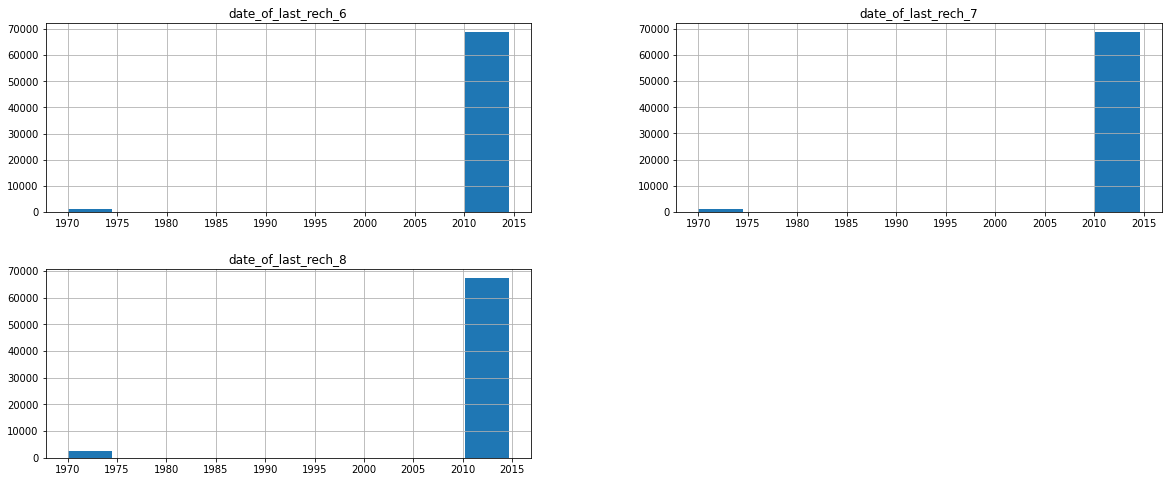

In [20]:
tc_train[date_cols].hist(figsize=(20,8));

In [21]:
for column in tc_train[date_cols].columns:
    print(tc_train[column].value_counts())
    print("")

2014-06-30    11880
2014-06-29     9049
2014-06-27     7800
2014-06-28     6752
2014-06-26     3918
2014-06-25     3402
2014-06-24     2888
2014-06-17     2887
2014-06-14     2686
2014-06-21     2654
2014-06-23     2060
2014-06-18     1886
2014-06-12     1746
2014-06-22     1624
2014-06-13     1468
2014-06-19     1387
2014-06-20     1252
1970-01-01     1101
2014-06-16      783
2014-06-15      605
2014-06-11      398
2014-06-08      368
2014-06-05      229
2014-06-07      223
2014-06-10      200
2014-06-03      172
2014-06-01      155
2014-06-09      135
2014-06-06      123
2014-06-04       90
2014-06-02       78
Name: date_of_last_rech_6, dtype: int64

2014-07-31    12206
2014-07-30     9716
2014-07-25     6577
2014-07-29     6320
2014-07-28     5370
2014-07-27     4136
2014-07-26     3765
2014-07-24     2750
2014-07-19     2144
2014-07-22     2061
2014-07-20     1999
2014-07-17     1915
2014-07-16     1687
2014-07-23     1590
1970-01-01     1234
2014-07-21     1138
2014-07-15     1102

### 4.1 key observation

- month and year remains constant in the columns date_of_last_rech_6, date_of_last_rech_7, date_of_last_rech_8. Hence I will extract day from this columns and overright the original columns itself.

In [22]:
## Removing the columns
# tc_train.drop(labels=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], axis=1, inplace=True)

## Filtering out the data for the year 2014
tc_train = tc_train[(tc_train.date_of_last_rech_6.dt.year == 2014) & (tc_train.date_of_last_rech_7.dt.year == 2014) \
                     & (tc_train.date_of_last_rech_8.dt.year == 2014)]

## Overwriting the existing columns with day instead of date
tc_train['date_of_last_rech_6'] = tc_train['date_of_last_rech_6'].dt.day
tc_train['date_of_last_rech_7'] = tc_train['date_of_last_rech_7'].dt.day
tc_train['date_of_last_rech_8'] = tc_train['date_of_last_rech_8'].dt.day

tc_train.shape

<ipython-input-22-200c0774e44b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tc_train['date_of_last_rech_6'] = tc_train['date_of_last_rech_6'].dt.day
<ipython-input-22-200c0774e44b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tc_train['date_of_last_rech_7'] = tc_train['date_of_last_rech_7'].dt.day
<ipython-input-22-200c0774e44b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

(65945, 128)

### 4.2 Implementing SMOTE to overcome class imbalance

In [22]:
## Checking for class im balance
print(tc_train.churn_probability.value_counts())
print()
print('Class imbalance in percentage \n', tc_train.churn_probability.value_counts()/len(tc_train))

0    60500
1     5445
Name: churn_probability, dtype: int64

Class imbalance in percentage 
 0    0.917431
1    0.082569
Name: churn_probability, dtype: float64


The data seems to be highly imbalance hence performing SMOTE to overcome this im balance

In [ ]:
X = tc_train.drop('churn_probability', axis=1)
y = tc_train['churn_probability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42 )

X_train.info(verbose=True, show_counts=True)

In [24]:
smote = SMOTE(random_state = 42)

# fit predictor and target variable
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape \n', y_train.value_counts(), end='\n')
print()
print('Resample dataset shape \n', y_train_smote.value_counts(), end='\n')

Original dataset shape 
 0    40530
1     3653
Name: churn_probability, dtype: int64

Resample dataset shape 
 0    40530
1    40530
Name: churn_probability, dtype: int64


In [25]:
## Seprating numberical, date and categorical cols
X_train_numberic = X_train_smote.select_dtypes(include=['number'])

X_train_cat = X_train_smote.select_dtypes(include=['object'])

X_train_date = X_train_smote.select_dtypes(include=['datetime64'])

print('Total Numberical columns', len(X_train_numberic.columns))
print('Total Caterforical columns', len(X_train_cat.columns))
print('Total number of date columns', len(X_train_date.columns))

Total Numberical columns 127
Total Caterforical columns 0
Total number of date columns 0


In [26]:
print(X_train_numberic.shape, X_train_cat.shape, X_train_date.shape)

(81060, 127) (81060, 0) (81060, 0)


The dataset have only numberical columns and no categroical and date columns.

In [27]:
pd.set_option('display.max_column', None)
X_train_numberic.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,84.777,371.077,287.924,11.94,132.74,61.33,24.58,192.84,99.18,7.28,0.0,0.0,1.94,0.0,0.0,11.94,128.09,61.33,6.98,22.38,19.91,0.00,0.70,0.00,0.00,0.00,0.00,18.93,151.18,81.24,0.00,4.64,0.00,15.64,169.76,79.26,0.0,0.0,0.0,15.64,174.41,79.26,0.0,0.0,0.0,0.00,0.00,0.80,0.0,0.0,0.0,34.58,325.59,161.31,60.39,438.29,26.18,2.63,9.44,18.84,0.00,0.00,0.00,63.03,447.74,45.03,4.03,4.56,4.25,54.74,71.91,76.49,0.0,0.00,0.0,58.78,76.48,80.74,121.81,524.23,125.78,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6,10,13,110,460,330,50,120,30,30,31,29,20,30,30,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0
1,261.284,209.174,184.392,24.49,34.44,30.38,230.84,270.91,265.58,37.34,0.0,0.0,32.56,0.0,0.0,19.78,27.53,26.86,202.71,270.91,265.58,0.00,0.00,0.00,0.00,0.00,0.00,222.49,298.44,292.44,0.28,6.91,3.51,0.00,0.00,0.00,0.0,0.0,0.0,0.28,6.91,3.51,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,222.78,305.36,295.96,20.83,24.56,25.46,329.18,243.01,442.41,3.38,0.00,1.63,353.39,267.58,469.51,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,354.08,267.58,469.51,0.48,0.00,0.0,0.00,0.00,0.00,0.20,0.00,0.00,4,3,2,360,128,260,120,128,130,29,22,25,120,128,130,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,206,0.0,0.0,0.0
2,569.970,122.103,0.000,925.01,212.39,0.00,642.01,89.09,0.00,0.00,0.0,0.0,0.00,0.0,0.0,2.19,0.00,0.00,28.31,3.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.51,3.54,0.00,922.81,212.39,0.00,613.69,85.54,0.00,0.0,0.0,0.0,1536.51,297.94,0.00,0.0,0.0,0.0,1.99,0.51,0.00,0.0,0.0,0.0,1569.03,302.01,0.00,0.00,0.00,0.00,46.59,18.38,3.68,0.00,0.00,0.00,46.59,18.38,3.68,0.36,5.40,0.00,763.71,55.64,8.90,0.0,0.00,0.0,764.08,61.04,8.90,810.68,79.51,12.58,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.08,0.00,8,4,1,570,140,0,110,110,0,25,31,26,110,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,930,0.0,0.0,0.0
3,271.083,96.824,143.660,54.31,9.13,48.98,223.38,80.24,86.74,0.00,0.0,0.0,0.00,0.0,0.0,54.31,9.13,48.98,223.03,70.84,84.64,0.06,9.39,2.09,0.28,0.00,0.00,277.41,89.38,135.73,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.28,0.00,0.00,0.0,0.0,0.0,277.69,89.38,135.73,73.41,34.64,162.28,194.13,47.21,57.48,0.00,0.93,0.00,267.54

In [28]:
X_train_numberic.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81060 entries, 0 to 81059
Data columns (total 127 columns):
 #    Column               Non-Null Count  Dtype  
---   ------               --------------  -----  
 0    arpu_6               81060 non-null  float64
 1    arpu_7               81060 non-null  float64
 2    arpu_8               81060 non-null  float64
 3    onnet_mou_6          81060 non-null  float64
 4    onnet_mou_7          81060 non-null  float64
 5    onnet_mou_8          81060 non-null  float64
 6    offnet_mou_6         81060 non-null  float64
 7    offnet_mou_7         81060 non-null  float64
 8    offnet_mou_8         81060 non-null  float64
 9    roam_ic_mou_6        81060 non-null  float64
 10   roam_ic_mou_7        81060 non-null  float64
 11   roam_ic_mou_8        81060 non-null  float64
 12   roam_og_mou_6        81060 non-null  float64
 13   roam_og_mou_7        81060 non-null  float64
 14   roam_og_mou_8        81060 non-null  float64
 15   loc_og_t2t_mou_6 

In [ ]:
X_train_numberic.isnull().sum()

As no null are present hence skipping the imputation step

### 4.3 Scaling Numberical columns 

In [30]:
# scaling the data between 0 and 1
scaler = MinMaxScaler()
X_train_numberic_scaled = pd.DataFrame(scaler.fit_transform(X_train_numberic), columns = X_train_numberic.columns)
X_train_numberic_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.015693,0.056963,0.032231,0.001619,0.016272,0.005704,0.002939,0.027377,0.007081,0.002554,0.0,0.0,0.000514,0.0,0.0,0.001857,0.017308,0.005704,0.001486,0.007463,0.005613,0.000000,0.000859,0.000000,0.000000,0.000000,0.000000,0.001779,0.019698,0.007359,0.000000,0.000570,0.000000,0.001881,0.026235,0.005682,0.0,0.0,0.0,0.001855,0.021385,0.005670,0.0,0.0,0.0,0.000000,0.000000,0.000838,0.0,0.0,0.0,0.003240,0.039296,0.011487,0.013838,0.052877,0.002448,0.000591,0.002344,0.003283,0.000000,0.000000,0.000000,0.008455,0.053612,0.004158,0.001417,0.000968,0.001241,0.009693,0.011708,0.013875,0.0,0.000000,0.0,0.010290,0.011337,0.014268,0.015786,0.062770,0.011614,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040323,0.075630,0.095238,0.006166,0.023953,0.016173,0.015156,0.036375,0.006743,1.000000,1.000000,0.933333,0.006062,0.009677,0.006743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101516,0.0,0.0,0.0
1,0.026973,0.047681,0.026960,0.003320,0.004222,0.002825,0.027605,0.038460,0.018960,0.013097,0.0,0.0,0.008625,0.0,0.0,0.003076,0.003720,0.002498,0.043159,0.090334,0.074872,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020904,0.038886,0.026489,0.000038,0.000850,0.000438,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000033,0.000847,0.000251,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.020871,0.036854,0.021075,0.004773,0.002963,0.002380,0.073961,0.060345,0.077096,0.001805,0.000000,0.000972,0.047405,0.032040,0.043352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.045888,0.032040,0.043351,0.206009,0.000000,0.0,0.000000,0.000000,0.000000,0.000147,0.000000,0.000000,0.024194,0.016807,0.007937,0.020179,0.006665,0.012742,0.036375,0.038800,0.029220,0.965517,0.700000,0.800000,0.036375,0.041290,0.029220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006255,0.0,0.0,0.0
2,0.046699,0.042689,0.017572,0.125396,0.026035,0.000000,0.076774,0.012648,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000341,0.000000,0.000000,0.006027,0.001180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002867,0.000

# 5: Model Building And Evaluations <a name="5"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

### 5.1 Implementing PCA

In [31]:
pca = PCA(random_state=42)

pca.fit(X_train_numberic_scaled)

PCA(random_state=42)

In [32]:
## Components from PCA
pca.components_

array([[-2.83158208e-02, -3.21978133e-02, -2.43063843e-02, ...,
        -3.31202126e-03, -3.84335306e-03, -3.70602754e-04],
       [ 1.94519936e-03,  8.97001673e-03,  1.32219026e-02, ...,
         5.12369789e-03,  7.11997898e-03,  2.85346151e-03],
       [ 2.91903051e-02,  1.58996020e-02, -3.04452364e-03, ...,
        -2.39161162e-03, -3.15600459e-04,  1.31914323e-03],
       ...,
       [ 2.61646809e-08,  5.65710593e-07, -2.47486358e-07, ...,
         2.56914747e-08,  4.43246188e-08, -5.60535369e-08],
       [-7.87069875e-07, -1.12662923e-06,  1.58906314e-06, ...,
        -2.10790525e-08, -1.03568226e-07,  4.29572736e-08],
       [ 4.94470911e-08, -6.60947901e-07, -3.88539792e-07, ...,
        -1.96681641e-07,  1.82583187e-08, -8.24544662e-08]])

In [33]:
pca.explained_variance_ratio_

array([2.33524345e-01, 1.75947043e-01, 1.36969221e-01, 1.05530298e-01,
       6.26235968e-02, 3.85399001e-02, 2.86671053e-02, 2.07249737e-02,
       1.73515301e-02, 1.59892939e-02, 1.37139583e-02, 1.21098602e-02,
       1.03952765e-02, 9.08907076e-03, 8.28836257e-03, 8.08187157e-03,
       6.51020291e-03, 5.64008000e-03, 5.09395903e-03, 4.85828713e-03,
       4.34912878e-03, 3.86543123e-03, 3.58795358e-03, 3.49611795e-03,
       3.37447403e-03, 3.14133982e-03, 2.98855383e-03, 2.79256389e-03,
       2.64447737e-03, 2.38572394e-03, 2.33045851e-03, 2.23819611e-03,
       2.10837707e-03, 1.90859664e-03, 1.83842266e-03, 1.77971827e-03,
       1.76381913e-03, 1.64192871e-03, 1.57851512e-03, 1.45286184e-03,
       1.43568033e-03, 1.35981732e-03, 1.27819098e-03, 1.24480456e-03,
       1.21606631e-03, 1.13393450e-03, 1.06705707e-03, 1.00839448e-03,
       9.79120841e-04, 9.32855302e-04, 8.87155116e-04, 8.50777597e-04,
       8.26355755e-04, 8.02965497e-04, 7.85308298e-04, 7.75350366e-04,
      

Text(0, 0.5, 'Cumulative variance explained')

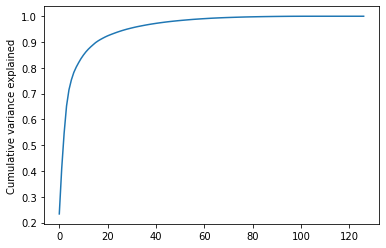

In [34]:
## Making a scree plot
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(var_cum)
plt.ylabel('Cumulative variance explained')

In [35]:
pca_final = IncrementalPCA(n_components=16)

In [36]:
X_train_pca = pca_final.fit_transform(X_train_numberic_scaled)
X_train_pca.shape

(81060, 16)

In [37]:
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(16, 16)

<AxesSubplot:>

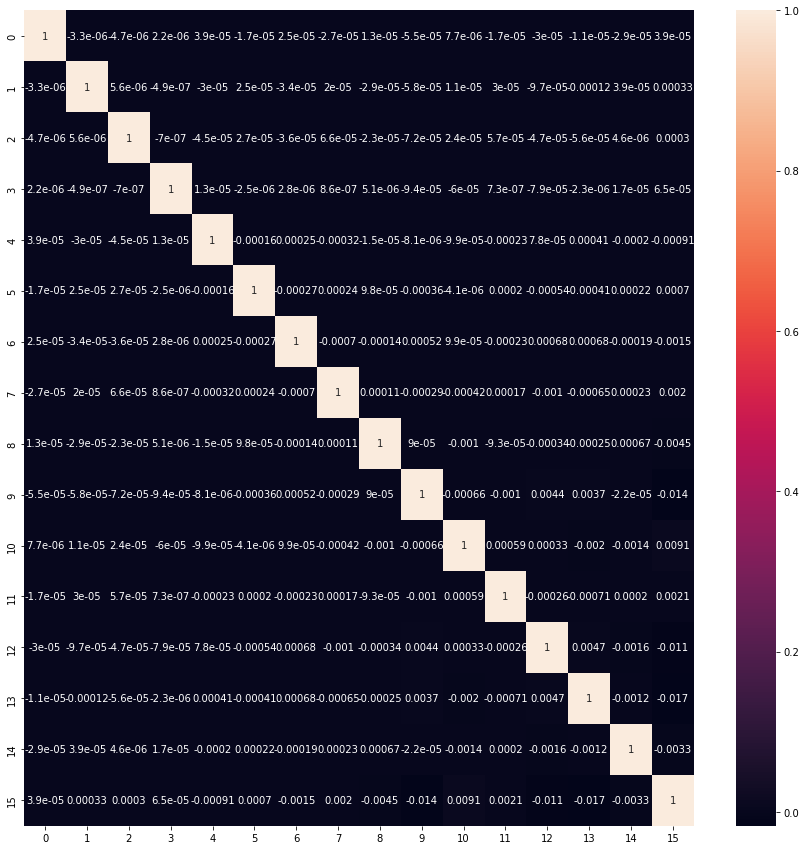

In [38]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

as we see most of the cells are dark black this showcase the newly created fretures are not co related to each other.

In [39]:
X_test

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
58031,218.802,74.203,287.146,71.26,24.78,7.13,174.81,78.43,97.14,0.00,0.00,0.00,0.00,0.00,0.00,71.26,24.78,7.13,174.81,77.98,66.41,0.00,0.45,3.51,0.00,0.0,3.04,246.08,103.21,77.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,27.23,0.0,0.0,0.0,246.08,103.21,104.29,18.41,6.21,19.04,79.14,50.71,46.49,7.03,10.13,1.46,104.59,67.06,67.01,0.00,0.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.81,0.00,104.59,67.88,67.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,5,5,160,84,335,110,30,198,26,23,30,50,27,10,0.0,0.00,690.96,0.0,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,0,838,0.00,0.00,0.00
40592,100.066,39.080,85.716,14.39,0.70,5.61,10.68,20.93,44.03,69.04,2.28,31.34,25.08,23.13,49.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,2,1,90,0,130,90,0,130,13,30,4,0,0,130,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1227,0.00,0.00,0.00
29661,78.117,58.871,79.967,5.76,18.08,7.66,69.76,57.99,68.78,0.00,0.00,0.00,0.00,0.00,0.00,5.76,18.08,7.66,66.04,56.04,67.31,3.68,1.95,1.46,0.00,0.0,0.00,75.49,76.08,76.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.03,0.00,0.00,0.0,0.0,0.0,75.53,76.08,76.44,123.11,60.29,83.19,120.88,80.03,77.61,82.93,79.33,55.41,326.93,219.66,216.23,0.00,0.00,0.00,3.88,6.15,0.00,0.18,0.00,0.00,4.06,6.15,0.00,331.21,225.81,216.26,0.00,0.00,0.00,0.00,0.00,0.00,0.21,0.00,0.03,4,5,2,80,110,50,50,110,50,14,20,12,50,0,50,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,411,0.00,0.00,0.00
60988,41.024,134.435,255.087,0.00,0.00,28.51,3.54,0.00,55.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.89,1.93,0.00,33.08,0.00,0.00,2.63,0.00,0.0,0.00,1.93,0.00,40.61,0.00,0.00,23.61,0.00,0.00,6.96,1.55,0.0,13.29,1.55,0.00,43.88,0.0,0.0,0.0,0.06,0.00,0.00,0.0,0.0,0.0,3.54,0.00,84.49,4.21,5.90,14.49,76.31,10.13,62.34,4.43,4.23,6.65,84.96,20.26,83.49,2.75,4.81,9.31

In [40]:
## Scaling the test set
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test_scaled.head()

##applying PCA
X_test_PCA = pca_final.transform(X_test_scaled)
X_test_PCA.shape

(21762, 16)

### 5.2 Building ML Models

In [41]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(X_train_pca,y_train_smote)
pred_probs_test = model_pca.predict_proba(X_test_PCA)
roc_auc_score(y_test, pred_probs_test[:, 1])

0.8011759827240861

In [42]:
## prediction on the test set
# pred_probs_test = model_pca.predict(X_test_PCA)

In [50]:
## Furture imporving the performance
pca_again = PCA(0.9)
X_train_pca2 = pca_again.fit_transform(X_train_numberic_scaled)
X_train_pca2.shape

(81060, 17)

In [44]:
##applying PCA
X_test_pca2 = pca_again.transform(X_test_scaled)
X_test_pca2.shape

(21762, 17)

In [45]:
## Logistic Regression
learner_pca2 = LogisticRegression()
learner_pca2.fit(X_train_pca2, y_train_smote)


## evaluation on test set
pred_pca2_proba = learner_pca2.predict_proba(X_test_pca2)
roc_auc_score(y_test, pred_pca2_proba[:, 1])

0.8437187030545819

In [57]:
## Making the prediction
churn_probability = learner_pca2.predict(tc_test_pca2)

## generating the CSV
my_submission = pd.DataFrame({'Id': tc_test_data.id, 'churn_probability': churn_probability})
my_submission.to_csv('submission_xgb_logistic_regression.csv', index=False)

In [46]:
## Reading Test data
tc_test_data = pd.read_csv(r'/content/Telecom-Churn-Prediction/test.csv')

## Applying all the required transformations
tc_test =tc_test_data.drop(labels=missing_cols, axis=1).copy()
tc_test =tc_test.drop(labels='id', axis=1).copy()
tc_test =tc_test.drop(labels=constant_cols, axis=1).copy()
tc_test[cols_nulls] = tc_test[cols_nulls].fillna(0)
tc_test[date_cols] = tc_test[date_cols].apply(pd.to_datetime, errors = 'coerce') 
tc_test['date_of_last_rech_6'] = tc_test['date_of_last_rech_6'].dt.day
tc_test['date_of_last_rech_7'] = tc_test['date_of_last_rech_7'].dt.day
tc_test['date_of_last_rech_8'] = tc_test['date_of_last_rech_8'].dt.day
tc_test_scaled = pd.DataFrame(scaler.transform(tc_test), columns = tc_test.columns)
tc_test_scaled.head()

tc_test_pca2 = pca_again.transform(tc_test_scaled)

## Making the prediction
churn_probability = learner_pca2.predict(tc_test_pca2)

# ## generating the CSV

# my_submission = pd.DataFrame({'Id': tc_test_data.id, 'churn_probability': churn_probability})
# my_submission.to_csv('submission.csv', index=False)

In [ ]:
%%time
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 250, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

## Random forest
forest = RandomForestClassifier(n_jobs=-1)
forest.fit(X_train_pca2, y_train_smote)

rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_pca2, y_train_smote)

#find the best model of grid search
best_random = rf_random.best_estimator_
best_random

{'n_estimators': [50, 54, 58, 62, 66, 70, 74, 78, 82, 86, 90, 94, 98, 103, 107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 147, 152, 156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 201, 205, 209, 213, 217, 221, 225, 229, 233, 237, 241, 245, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_params_

In [ ]:
def evaluate(model, test_features, test_labels):
    y_pred = model.predict(X_test_pca2)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print (accuracy)
    print(confusion_matrix(y_test,y_pred))
    

best_random = rf_random.best_estimator_

## Making the prediction
churn_probability = best_random.predict(tc_test_pca2)

## generating the CSV
my_submission = pd.DataFrame({'Id': tc_test_data.id, 'churn_probability': churn_probability})
my_submission.to_csv('submission_random_forest.csv', index=False)

In [47]:
%%time
## XGBClassfier
model = XGBClassifier(random_state=42, missing=1,)
model.fit(X_train_pca2, y_train_smote)

CPU times: user 54 s, sys: 507 ms, total: 54.5 s
Wall time: 33.8 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=1, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [48]:
## Prediction of baseline model

## Making the prediction
churn_probability = model.predict(tc_test_pca2)

## generating the CSV
my_submission = pd.DataFrame({'Id': tc_test_data.id, 'churn_probability': churn_probability})
my_submission.to_csv('submission_xgb_baseline.csv', index=False)

In [ ]:
%%time
# XGBoost
# n_jobs=-1 to allow run it on all cores

params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree'],
    'gamma': [0, 0.5, 1],
    # 'reg_alpha': [0, 0.5, 1],
    # 'reg_lambda': [0.5, 1, 5],
    # 'subsample': [0.6, 0.8, 1.0],
}

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1, tree_method='gpu_hist', predictor='gpu_predictor'), 
                         params, n_jobs=-1, cv=KFold(n_splits=5), scoring='roc_auc',
                         )
gs2.fit(X_train_pca2, y_train_smote)

In [56]:
print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)


## Making the prediction
churn_probability = gs2.best_estimator_.predict(tc_test_pca2)

## generating the CSV
my_submission = pd.DataFrame({'Id': tc_test_data.id, 'churn_probability': churn_probability})
my_submission.to_csv('submission_xgb_v4.csv', index=False)

Best score: nan
Best score: {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.01, 'n_estimators': 100}


## Light GBM

In [85]:
train_file_path = zipfile.ZipFile('/content/Telecom-Churn-Prediction/train.zip') 
train = pd.read_csv(train_file_path.open('train.csv'))
test = pd.read_csv(r'/content/Telecom-Churn-Prediction/test.csv')

In [86]:
# drop object variables which indicates dates in the dataset.
num_cols = test.select_dtypes(include=['float64','int64']).columns.tolist()
num_cols.remove('id')

In [87]:
# prepare dataset
X = train[num_cols]
Y = train['churn_probability']
FEATURES = num_cols
TARGET = 'churn_probability'

In [88]:
import time
FOLDS=5
# One of the ground rule for hyper-parameter setting for LGBM is setting small learning_rate with large num_iterations. 
# Also, as there are only 29 X features, so it's better to set max_depth small (4 ~ 8) to avoid over-fitting.
# reference: https://www.kaggle.com/code/odins0n/playground-s-3-e-4-eda-modelling

lgb_params = {
    'objective' : 'binary',
    'metric' : 'auc',
    'learning_rate': 0.002,
    'max_depth': 6,
    'num_iterations': 1000
}



# lgb_params ={'objective': 'binary',
#              'metric': 'auc',
#              'lambda_l1': 1.0050418664783436e-08, 
#              'lambda_l2': 9.938606206413121,
#              'num_leaves': 44,
#              'feature_fraction': 0.8247273276668773,
#              'bagging_fraction': 0.5842711778104962,
#              'bagging_freq': 6,
#              'min_child_samples': 70,
#              'max_depth': 8,
#              'num_iterations': 400,
#              'learning_rate':0.05}

lgb_predictions = 0
lgb_scores = []
lgb_imp = []

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=1004)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train[FEATURES], train[TARGET])):
    
    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    
    X_train, X_valid = train.iloc[train_idx][FEATURES], train.iloc[valid_idx][FEATURES]
    y_train , y_valid = train[TARGET].iloc[train_idx] , train[TARGET].iloc[valid_idx]
    
    model = LGBMClassifier(**lgb_params)
    model.fit(X_train, y_train,verbose=0)
    
    preds_valid = model.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid,  preds_valid)
    lgb_scores.append(auc)
    run_time = time.time() - start_time
    
    print(f"Fold={fold+1}, AUC score: {auc:.2f}, Run Time: {run_time:.2f}s")
    fim = pd.DataFrame(index=FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    lgb_imp.append(fim)
    test_preds = model.predict_proba(test[FEATURES])[:, 1]
    lgb_predictions += test_preds/FOLDS
    
print("Mean AUC :", np.mean(lgb_scores))

========== Fold=1 ==========


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Fold=1, AUC score: 0.93, Run Time: 77.84s
========== Fold=2 ==========


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Fold=2, AUC score: 0.93, Run Time: 69.60s
========== Fold=3 ==========


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Fold=3, AUC score: 0.94, Run Time: 68.14s
========== Fold=4 ==========


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Fold=4, AUC score: 0.94, Run Time: 68.95s
========== Fold=5 ==========


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Fold=5, AUC score: 0.94, Run Time: 67.82s
Mean AUC : 0.9372973203678067


In [89]:
submission = test.copy()
submission['churn_probability'] = np.where(lgb_predictions > 0.5, 1, 0)
submission = submission[['id','churn_probability']]

In [90]:
submission.to_csv('submission_lgbm.csv', index=False)

# 6: Summay and Conclusion <a name="6"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# 7: References <a name="7"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 